**Step 01 # Install the Ultralytics Package**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Step 02 # Import All the Requried Libraries**

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/107.7 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Bdin0HMq8n2IbST2c34B")
project = rf.workspace("kunal-gaikwad").project("augmented-neu-dataset")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Augmented-Neu-Dataset--3 in yolov11:: 100%|██████████| 22252/22252 [00:03<00:00, 5934.97it/s]


In [2]:
dataset.location

'/content/Augmented-Neu-Dataset--3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [4]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11m.pt" epochs=1 imgsz=200

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/Augmented-Neu-Dataset--3/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

**Step # 05 Examine Training Results**

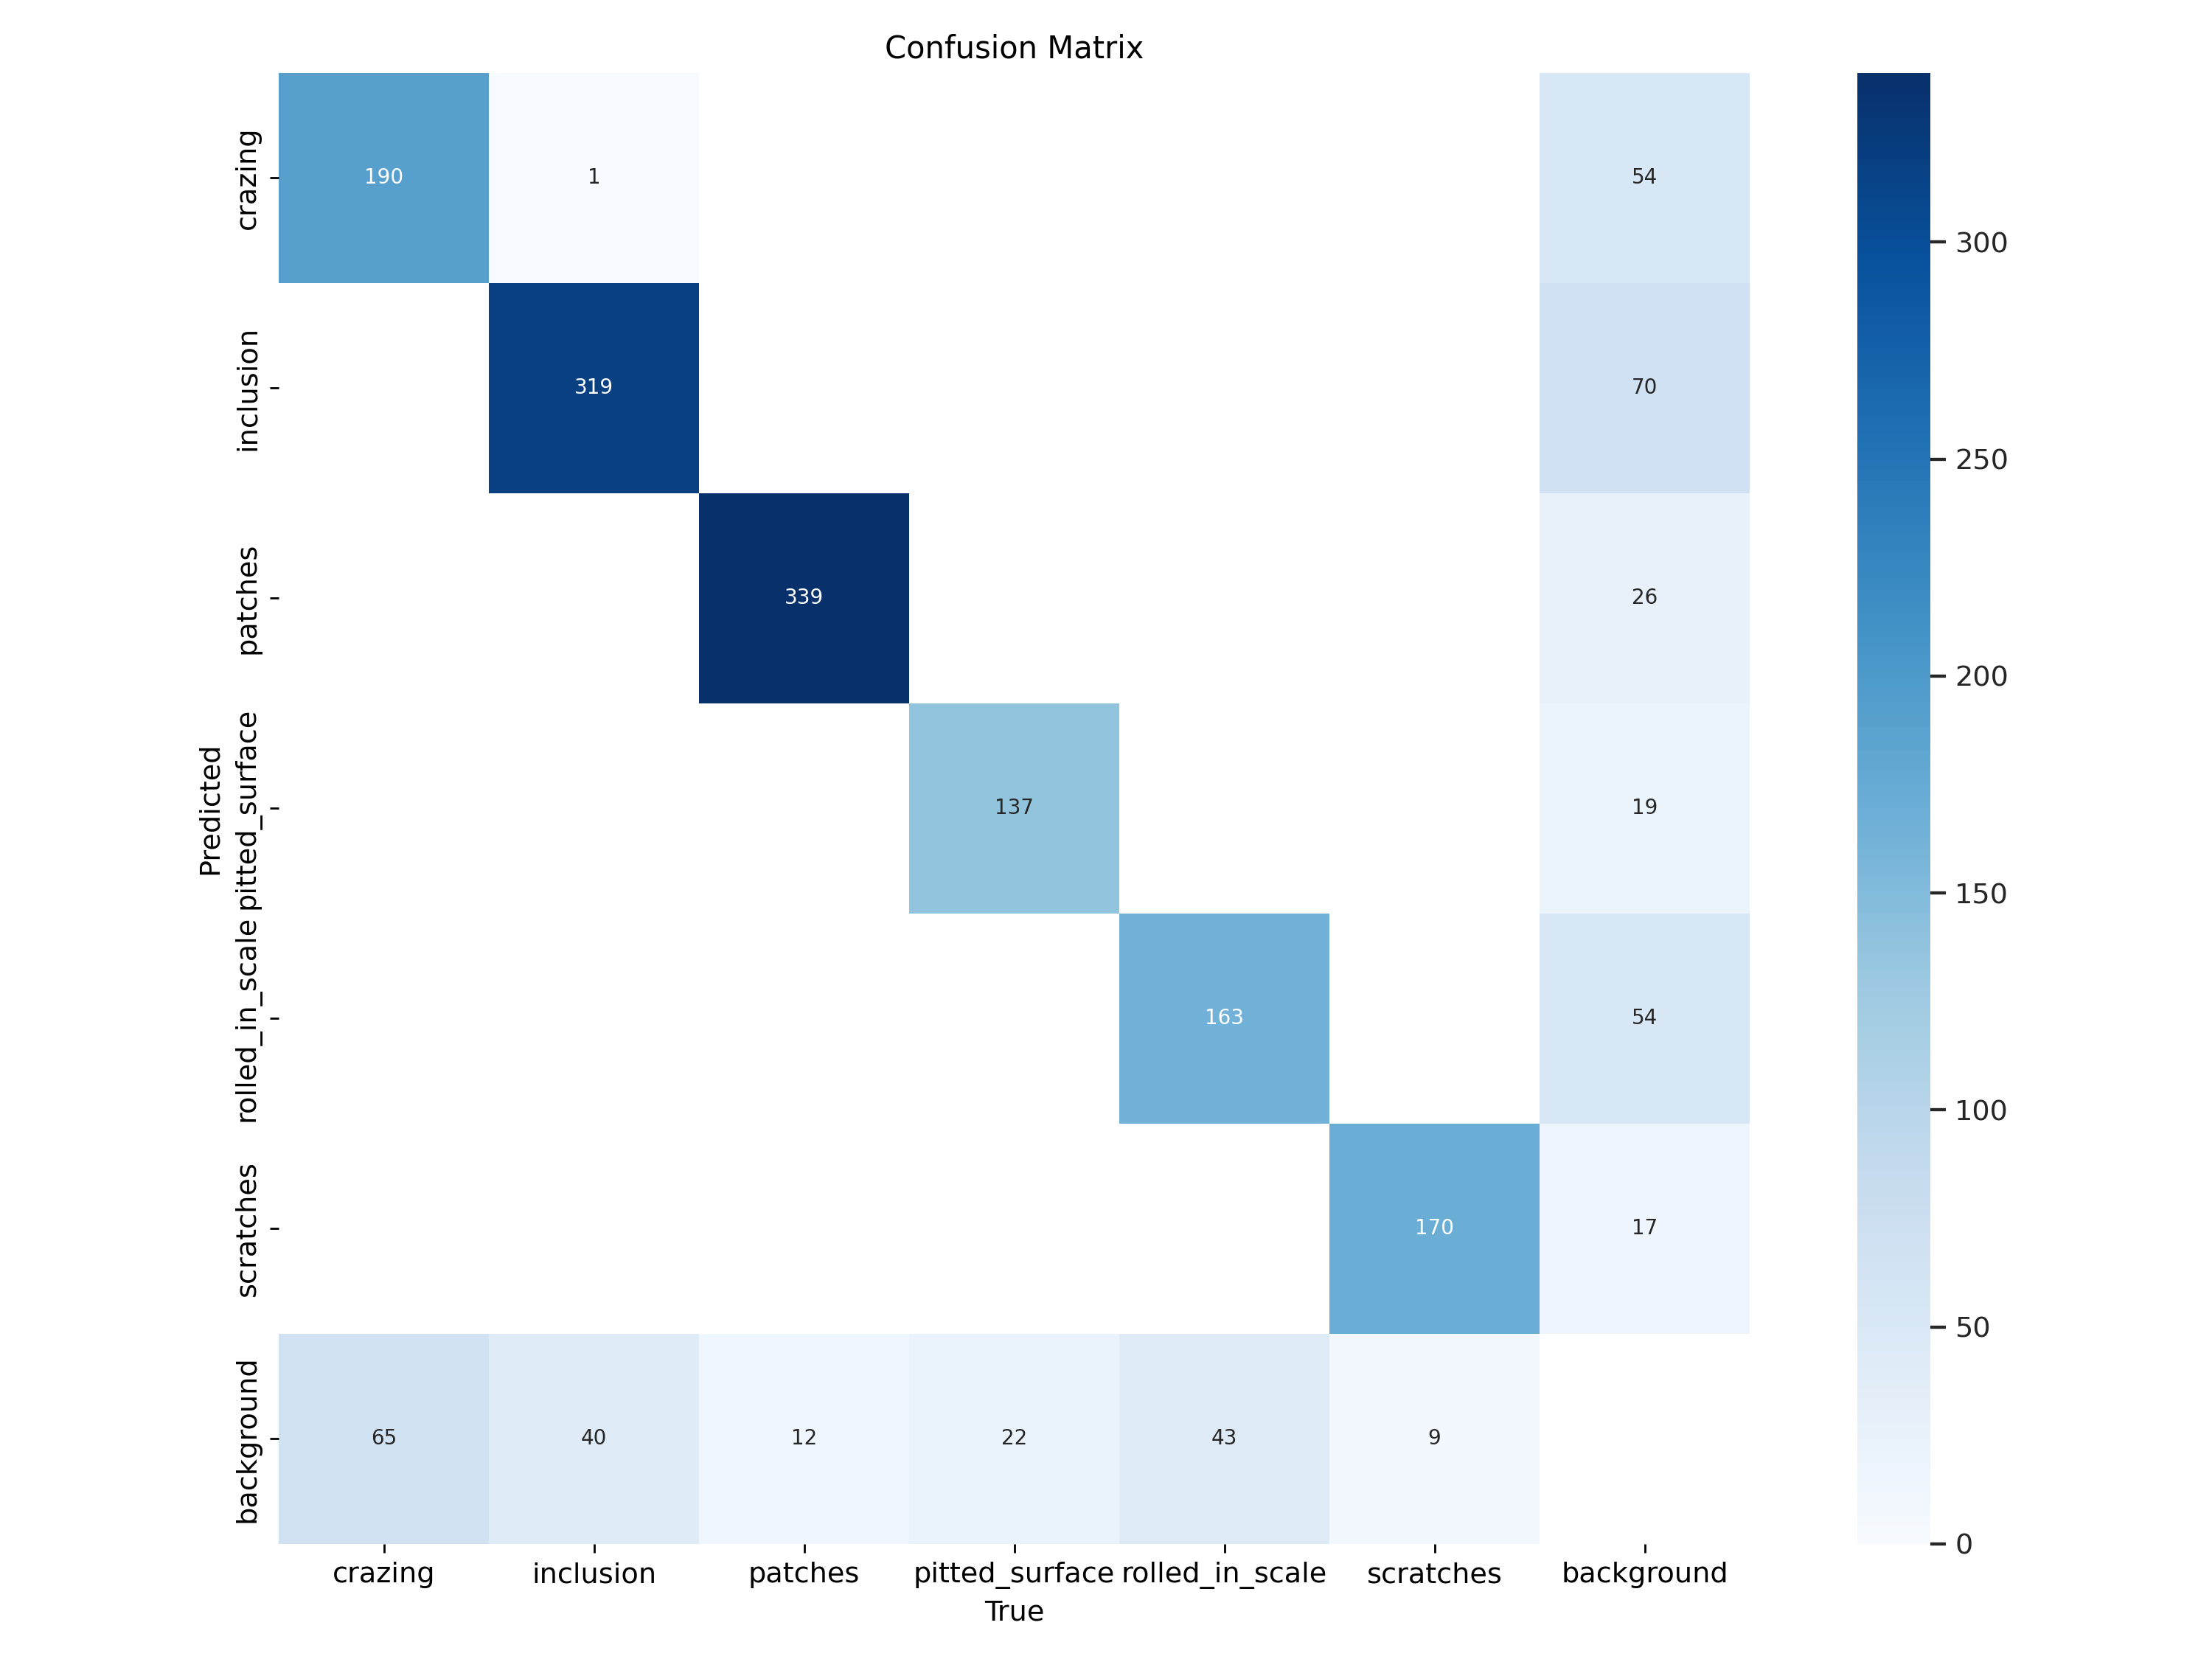

In [8]:
from IPython.display import Image # Re-import Image

Image("/content/confusion_matrix.png", width=600)

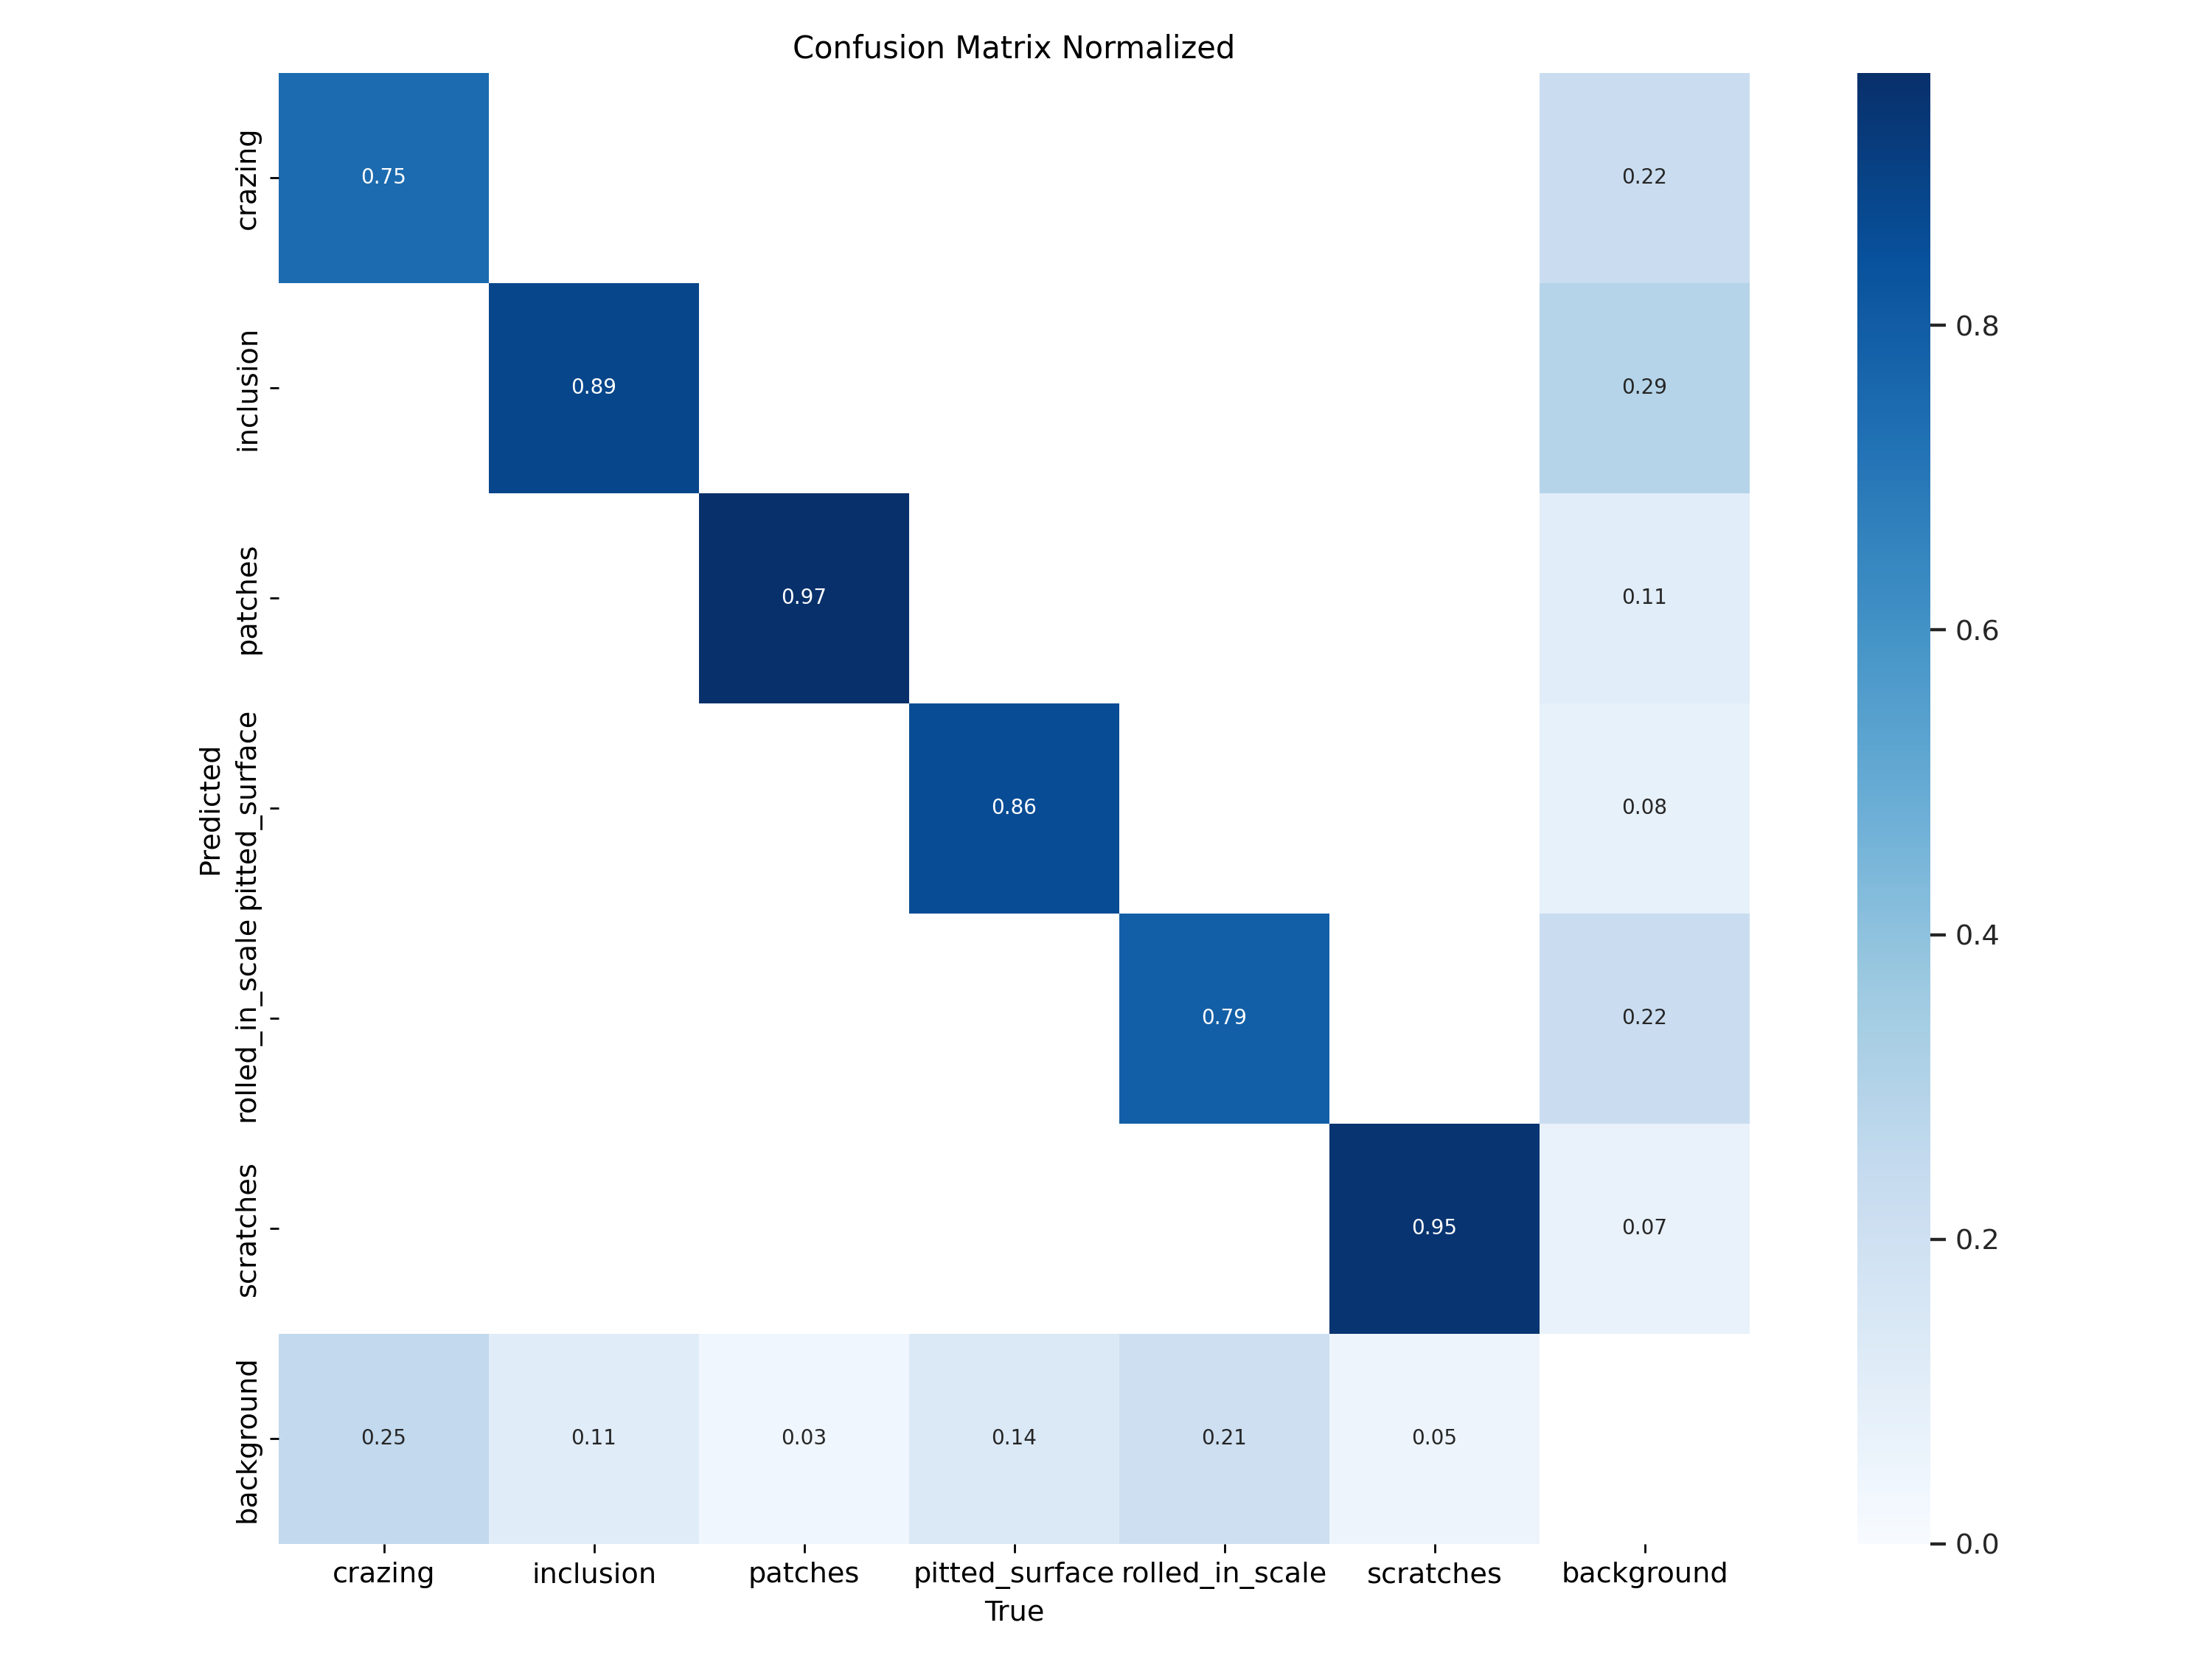

In [9]:
Image("/content/confusion_matrix_normalized.png", width=600)

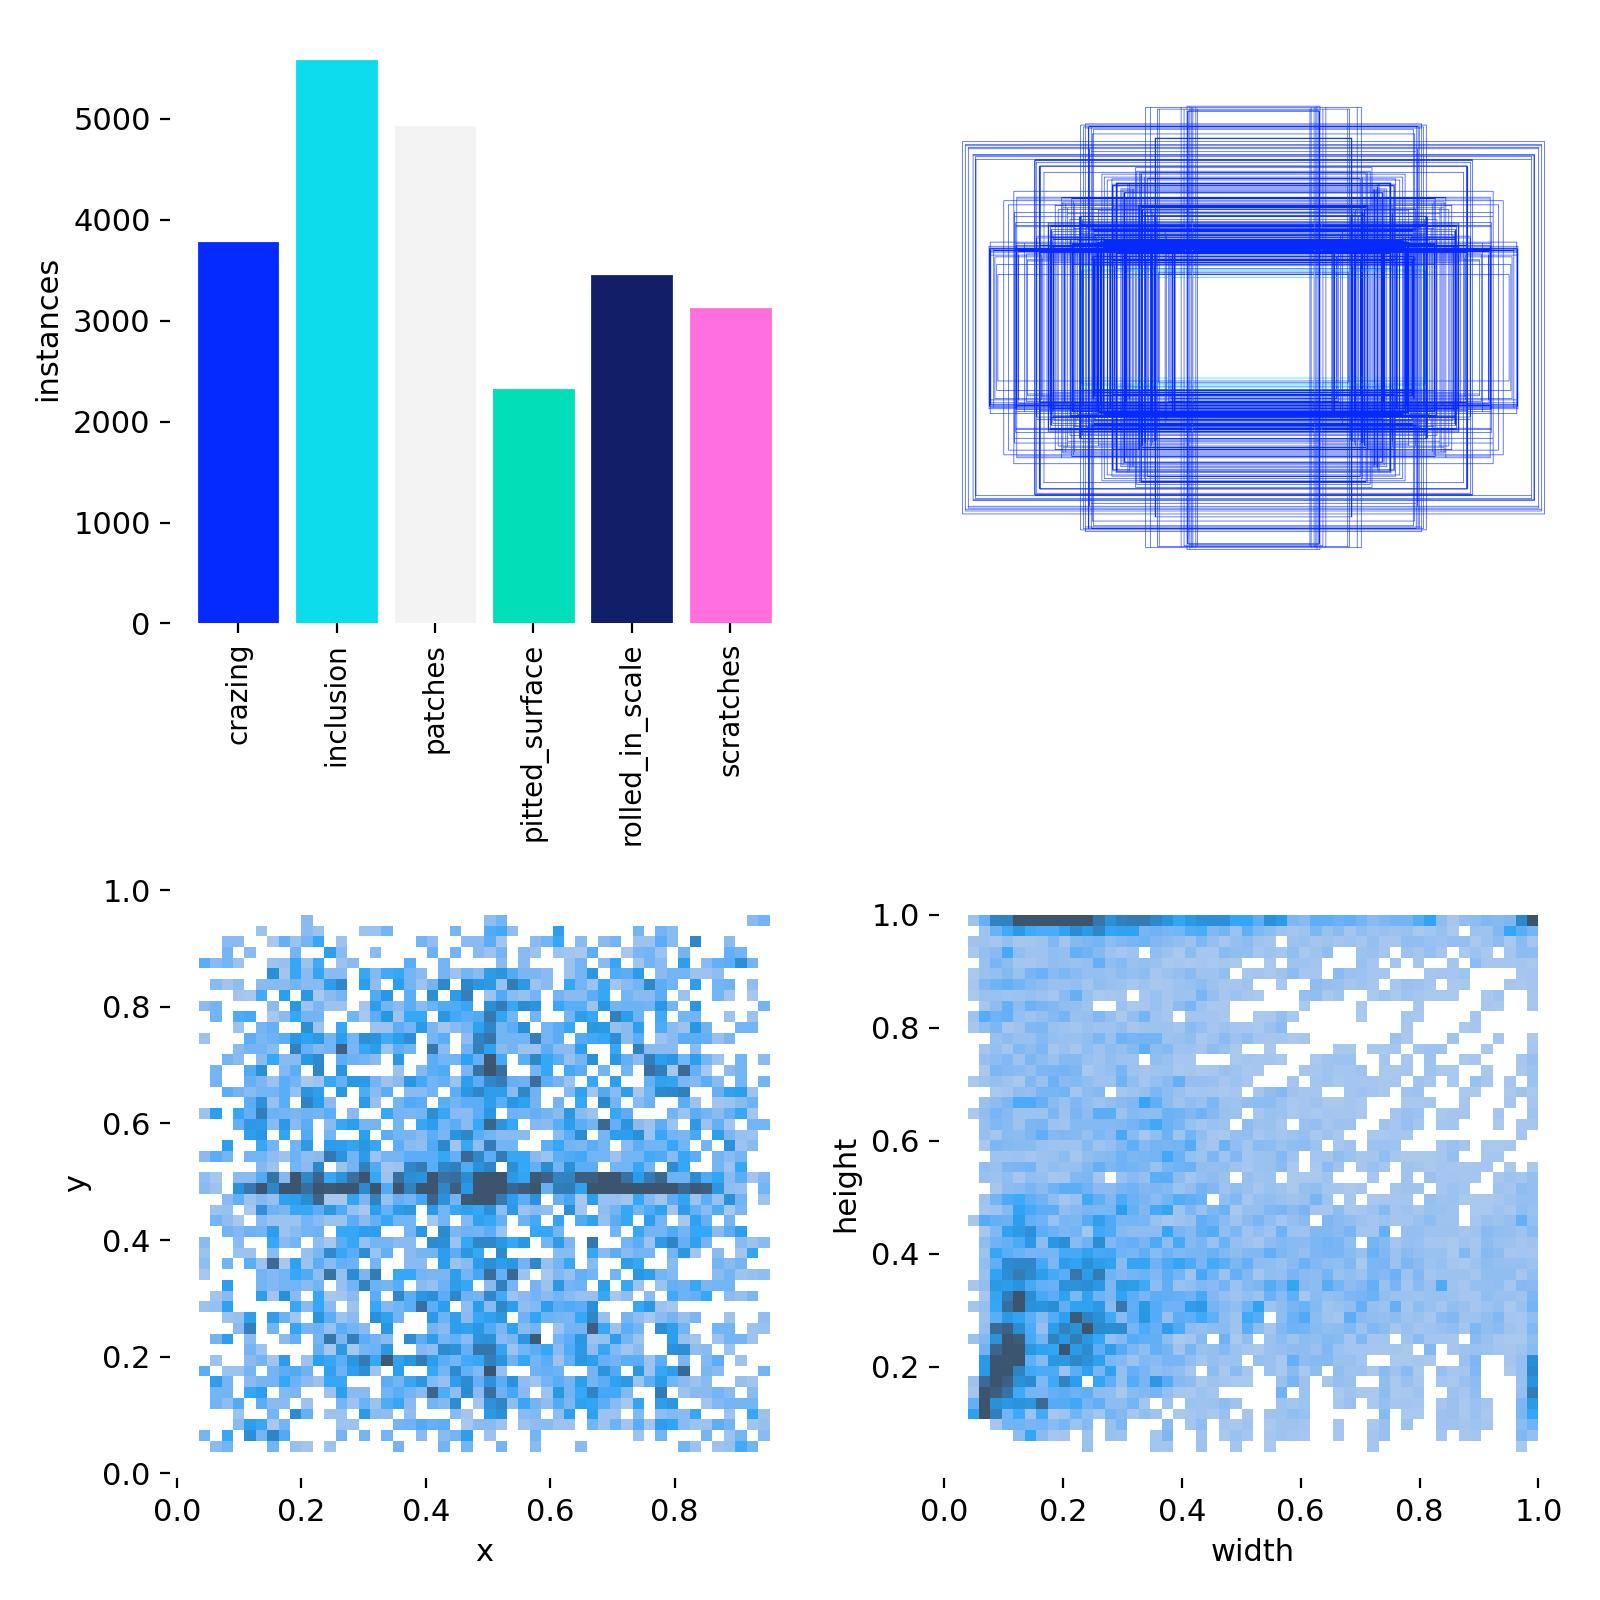

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

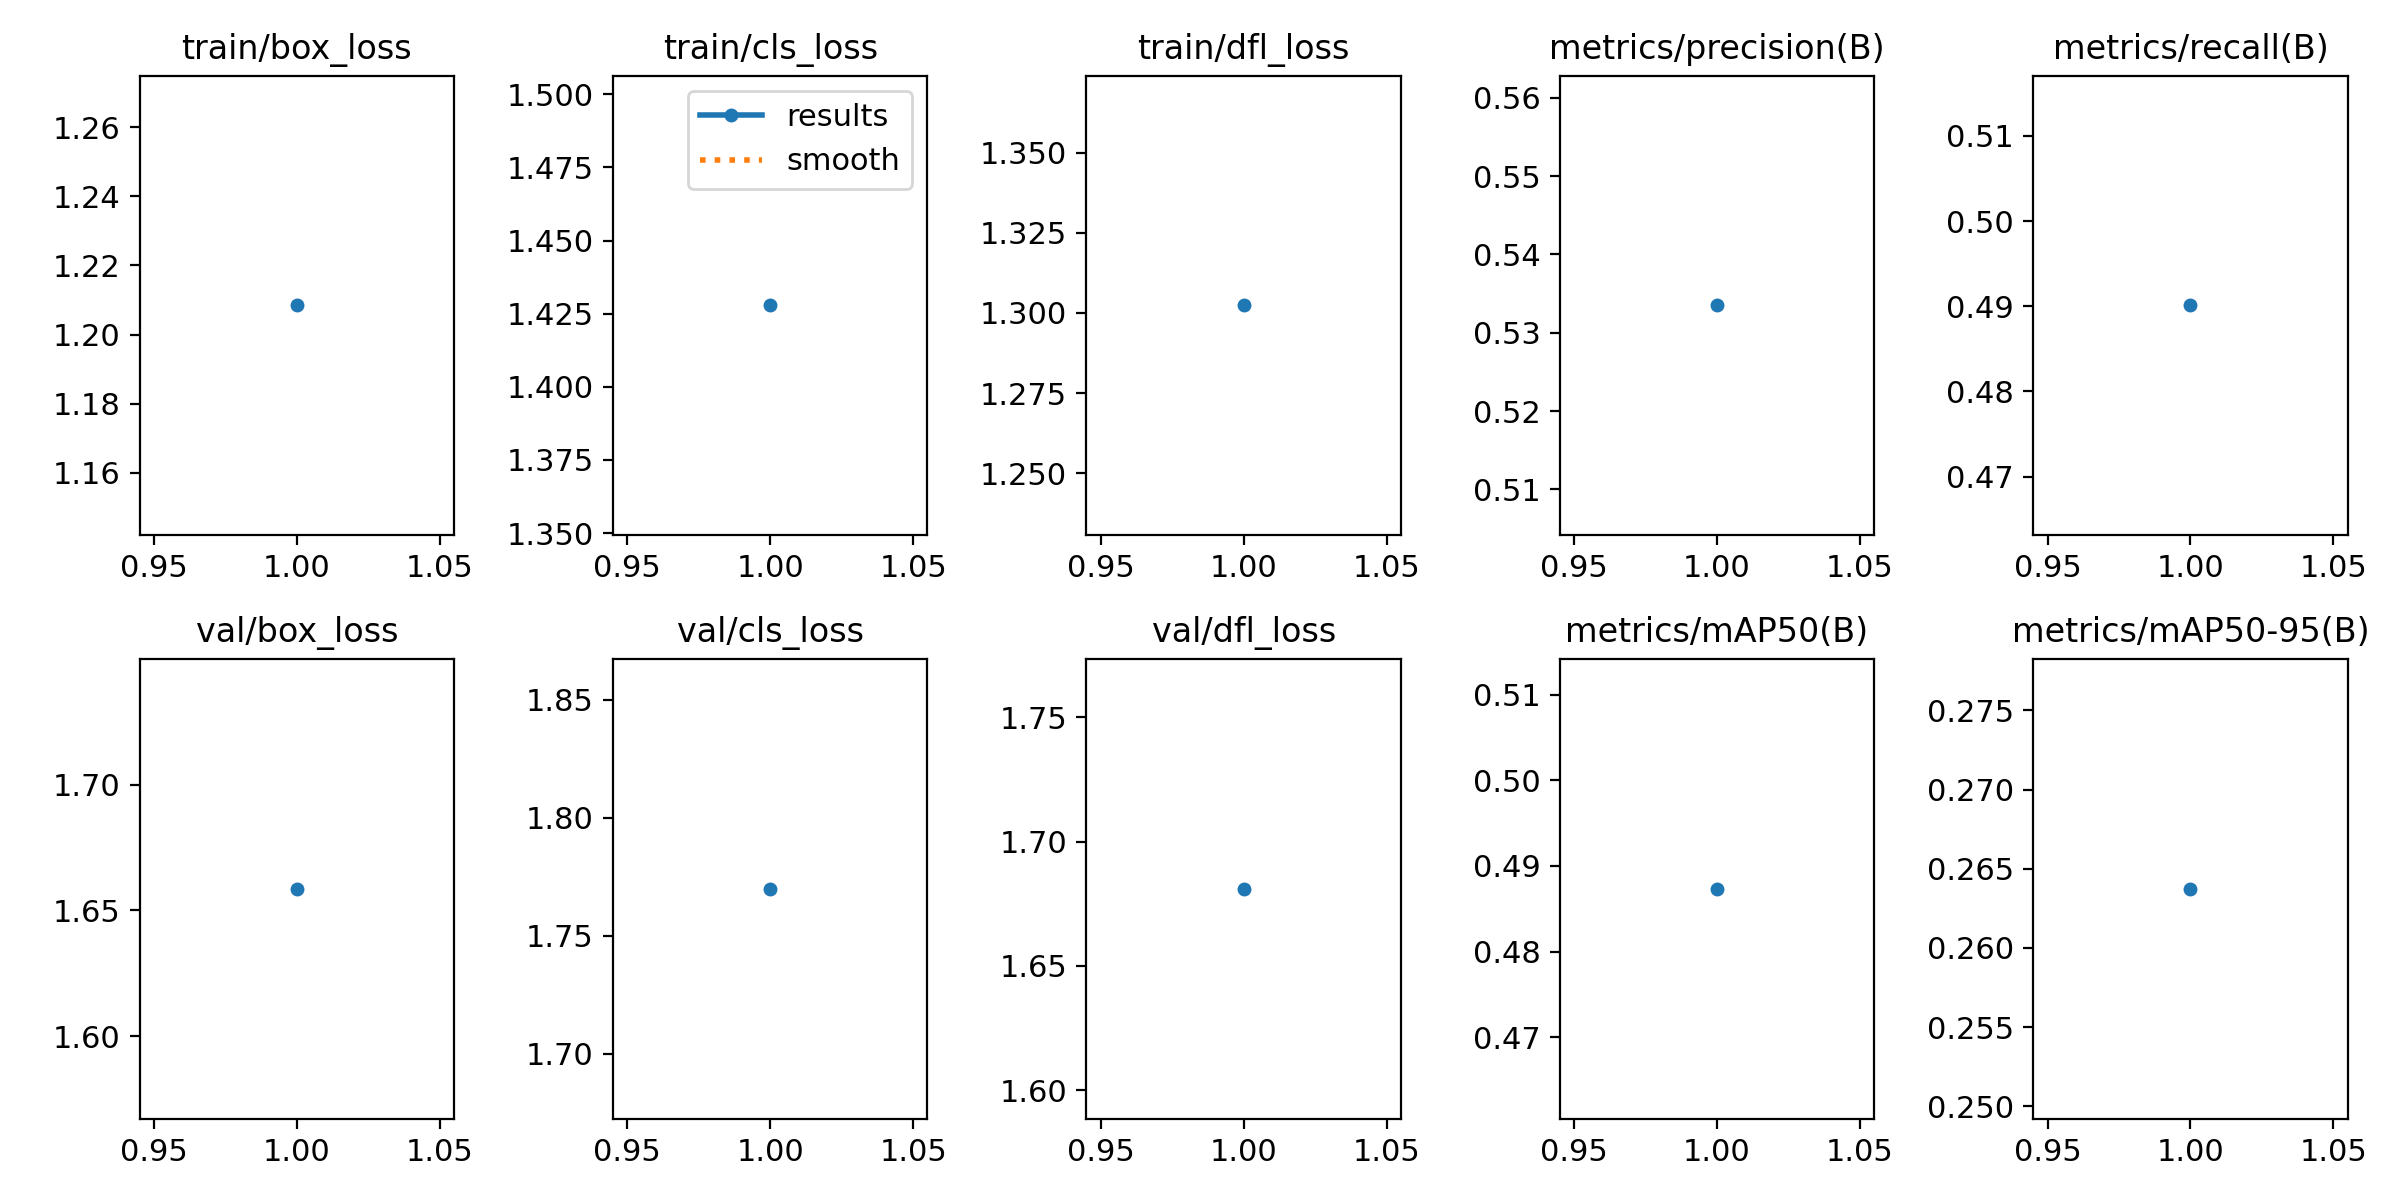

In [16]:
Image("/content/runs/detect/train2/results.png", width=600)

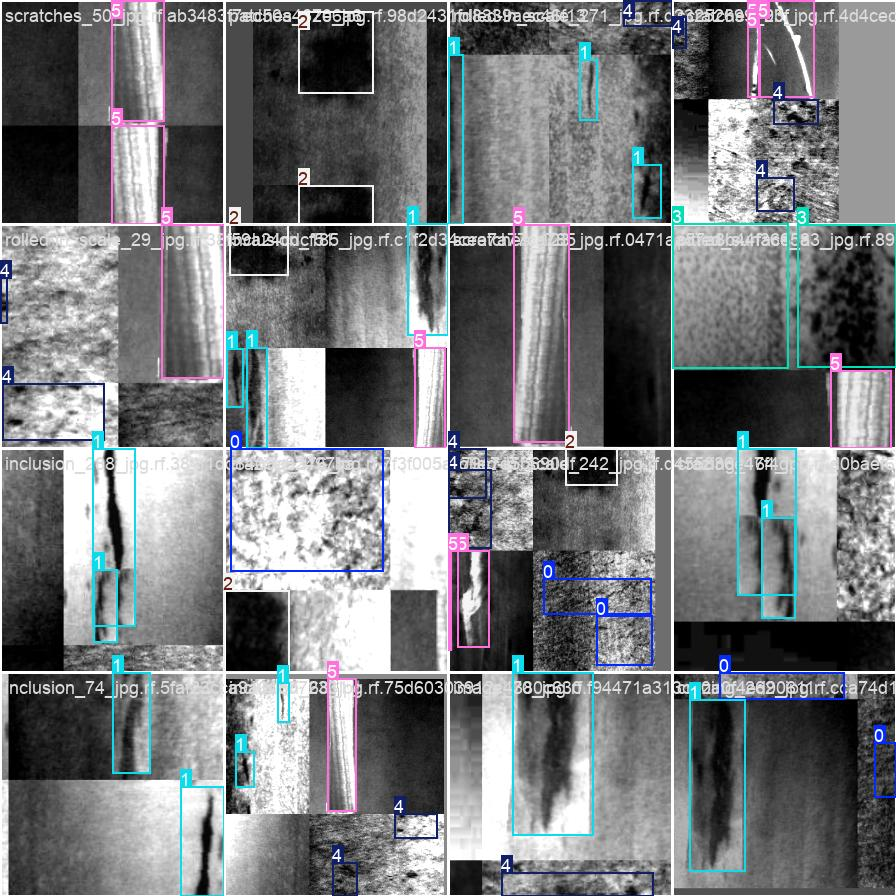

In [17]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

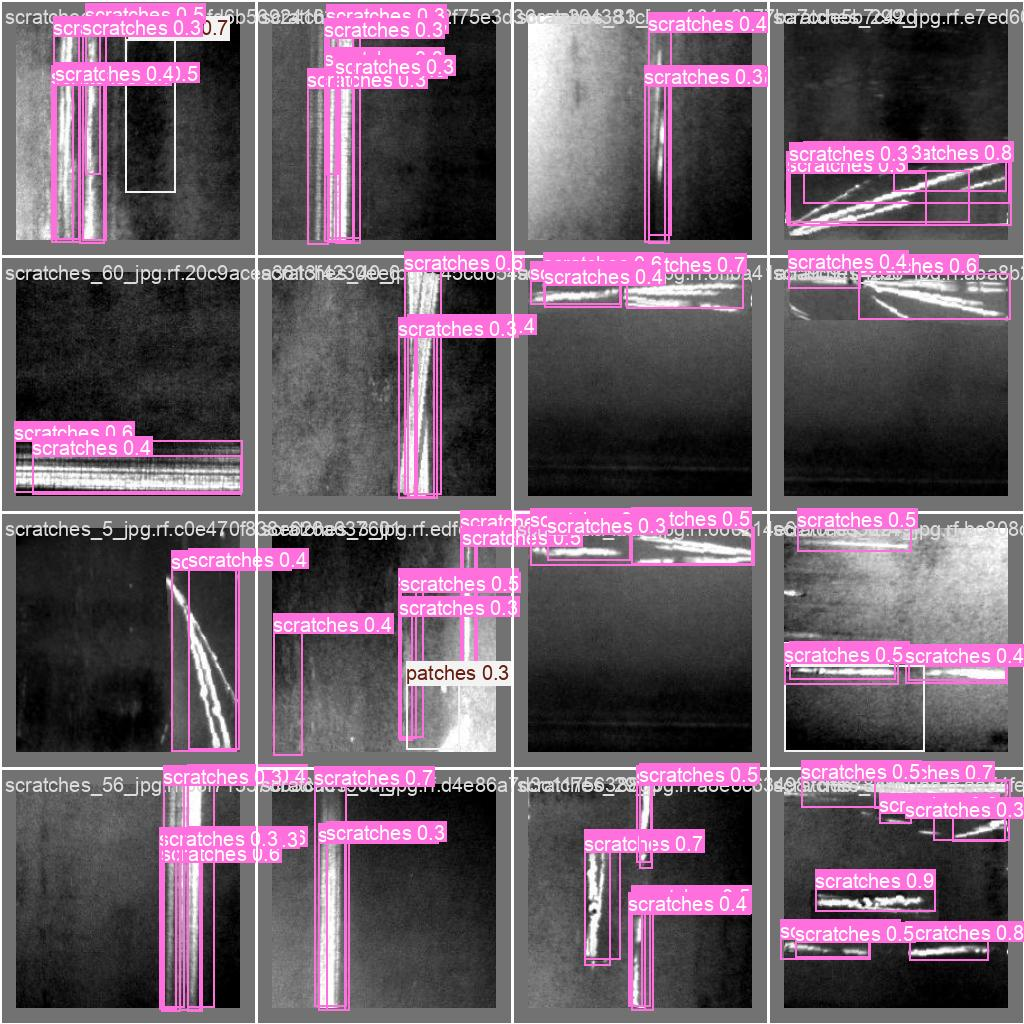

In [18]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

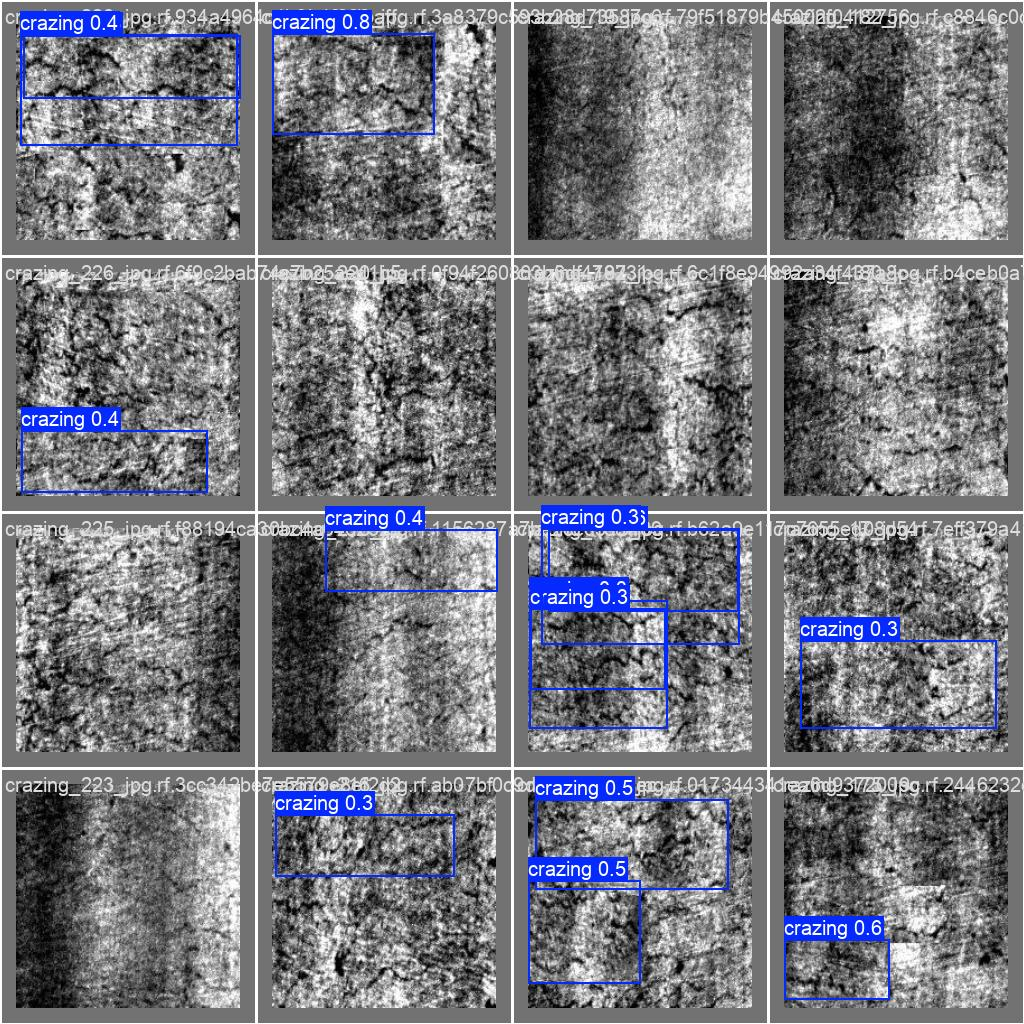

In [19]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [20]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/Augmented-Neu-Dataset--3/valid/labels.cache... 684 images, 33 backgrounds, 0 corrupt: 100% 684/684 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [03:36<00:00,  5.04s/it]
                   all        684       1510      0.533      0.491      0.488      0.264
               crazing        107        255      0.458      0.318      0.356       0.18
             inclusion        142        360      0.685      0.431      0.534       0.27
               patches        135        351      0.554      0.781      0.751      0.513
        pitted_surface        112        159      0.592      0.338      0.434      0.255
       rolled_in_scale         97        206      0.645      0.264       0.37      0.197
             scratches        105    

**Step # 08 Inference with Custom Model on Images**

In [21]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs

image 1/349 /content/Augmented-Neu-Dataset--3/test/images/adjusted_image_4_jpg.rf.88869dab5a8d0120968b3ce9a1df3466.jpg: 224x224 1 crazing, 1 inclusion, 232.4ms
image 2/349 /content/Augmented-Neu-Dataset--3/test/images/bg-89-_jpg.rf.e7f2bbcc74135a62a438762d6a71c191.jpg: 224x224 1 crazing, 221.3ms
image 3/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_109_jpg.rf.04f08bbb72a0dc4d397aba9f00ebc94e.jpg: 224x224 1 crazing, 216.1ms
image 4/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_110_jpg.rf.deffe48701d6bd1881aedf4b27d0167e.jpg: 224x224 1 crazing, 1 patches, 208.3ms
image 5/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_113_jpg.rf.90f5afcd3320ab26af35133424f9443a.jpg: 224x224 1 crazing, 209.1ms
image 6/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_125_jpg.rf.2c005090febf21db5d360a97

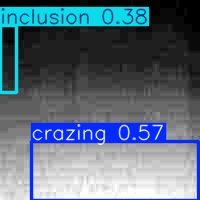

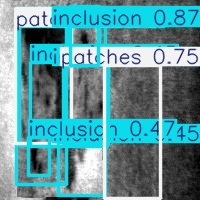

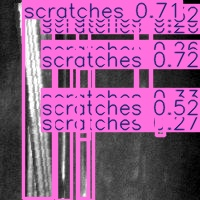

In [32]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Find the latest prediction folder (assuming it's a subfolder within 'runs/detect/predict')
prediction_folders = glob.glob('/content/runs/detect/predict')
latest_folder = max(prediction_folders, key=os.path.getmtime) if prediction_folders else None

# If a prediction folder is found, display images
if latest_folder:
    for img_path in glob.glob(os.path.join(latest_folder, '*.jpg'))[1:4]:
        display(IPyImage(filename=img_path, width=600))
        print("\n")
else:
    print("No prediction folders found.")

In [34]:
!yolo task=detect mode=predict \
    model="/content/runs/detect/train2/weights/best.pt" \
    conf=0.25 \
    source="/content/Augmented-Neu-Dataset--3/test/images/scratches_266_jpg.rf.96d5b4f416e8db74574510e1ea4342f2.jpg" \
    save=True


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/Augmented-Neu-Dataset--3/test/images/scratches_266_jpg.rf.96d5b4f416e8db74574510e1ea4342f2.jpg: 224x224 1 rolled_in_scale, 4 scratchess, 376.8ms
Speed: 1.1ms preprocess, 376.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
